#Regression (Regresi)

Definisi regresi adalah statistik yang digunakan untuk memodelkan dan menganilisis hubungan antar variabel independen (prediktor) dan variabel dependen (target)
tujuan : untuk memprediksi atau memperkirakan nilai variabel dependen berdasarkan nilai-nilai variabel independen

#Generated Synthetic Data

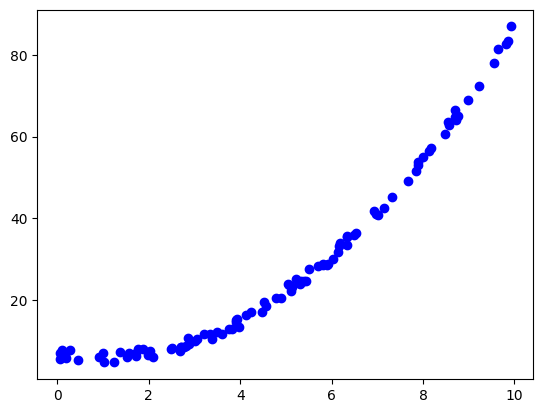

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
x = np.random.rand(100, 1) * 10  # 100 random independent values between 0 and 10
y = 0.5 + x**2 - 2*x + 5 + np.random.rand(100, 1) * 3  # Dependent variable with some randomness

# Plotting the data
plt.scatter(x, y, color='blue')
plt.show()

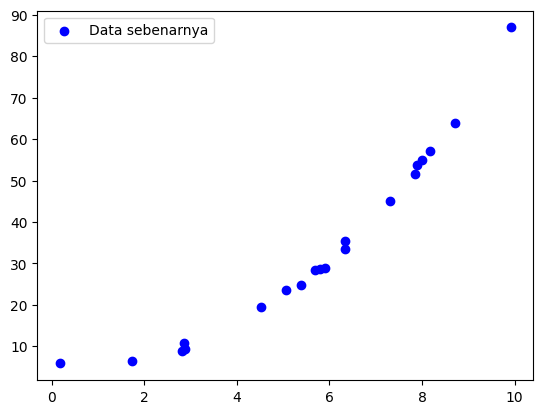

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Plot the test data
plt.scatter(x_test, y_test, color='blue', label='Data sebenarnya')
plt.legend()
plt.show()

#Linear Regression

Definisi : merupakan model regresi yang tujuannya untuk mencari hubungan linear antara variabel independen dan dependen

$$
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

hasil MSE = 50.64482841930264


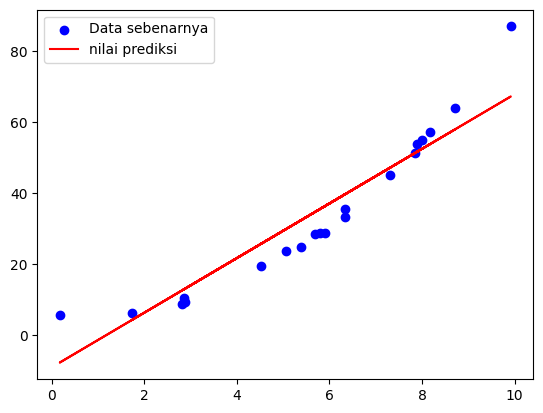

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
#training
linear_model.fit(x_train,y_train)

#testing
y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
print(f"hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label='Data sebenarnya')
plt.plot(x_test,y_pred, color = 'red', label = 'nilai prediksi')
plt.legend()
plt.show()

#Ridge Regression

Definisi + salah satu bagian dari linear regression dengan menambahkan penalti L2 regularization, agar dapat membantu mengurangi agar dapat membantu mengurangi overfitting

$$
L(\beta) = \sum{i=1}^{m} (y_i - \hat{y_i}^2 + \lambda \sum_{j=i}^{n} \beta_j^2
$$

Loss Function = jumlah kesalahan kuadrat + lambda * penalti (L2 regularization)

Hasil MSE = 50.7116300059199


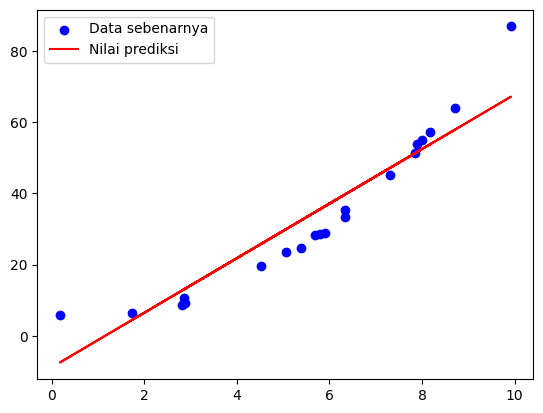

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inisialisasi model Ridge dengan alpha = 1.0
ridge_model = Ridge(alpha=1.0)

# Melatih model dengan data training
ridge_model.fit(x_train, y_train)

# Memprediksi menggunakan data testing
y_pred = ridge_model.predict(x_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Hasil MSE = {mse}")

# Visualisasi hasil prediksi
plt.scatter(x_test, y_test, color='blue', label='Data sebenarnya')
plt.plot(x_test, y_pred, color='red', label='Nilai prediksi')
plt.legend()
plt.show()


#Lasso Regression

Definisi + salah satu bagian dari linear regression dengan menambahkan penalti L1 regularization, agar dapat membantu mengurangi agar dapat membantu mengurangi overfitting

$$
L(\beta) = \sum{i=1}^{m} (y_i - \hat{y_i}^2 + \lambda \sum_{j=i}^{n} \|beta_j|
$$

Hasil MSE = 50.714536910934335


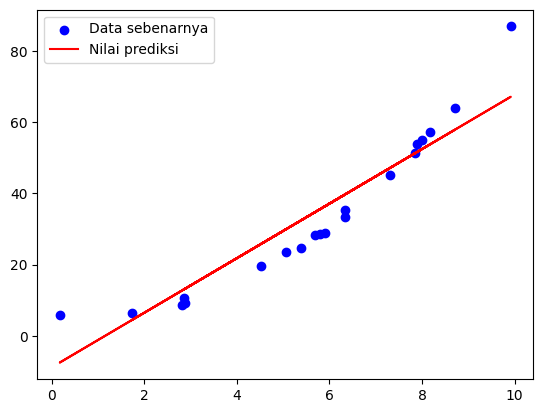

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inisialisasi model Lasso dengan alpha = 0.1
lasso_model = Lasso(alpha=0.1)

# Melatih model dengan data training
lasso_model.fit(x_train, y_train)

# Memprediksi menggunakan data testing
y_pred = lasso_model.predict(x_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Hasil MSE = {mse}")

# Visualisasi hasil prediksi
plt.scatter(x_test, y_test, color='blue', label='Data sebenarnya')
plt.plot(x_test, y_pred, color='red', label='Nilai prediksi')
plt.legend()
plt.show()


#Polynomial Regression

$$
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

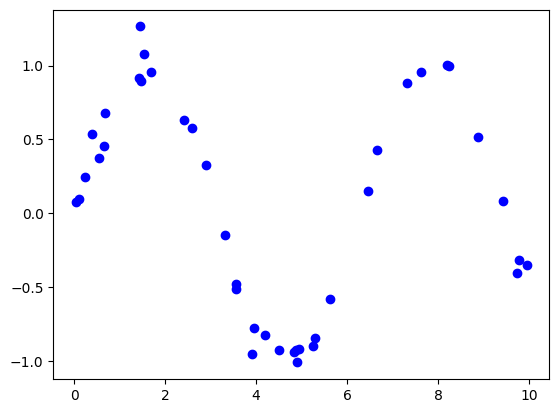

In [45]:
from sklearn.preprocessing import PolynomialFeatures
#generate synthetic data
x = np.sort(np.random.rand(40) * 10).reshape(-1, 1)
y = np.sin(x).ravel() + np.random.randn(40) * 0.1
plt.scatter(x, y, color='blue')

Text(0.5, 1.0, 'Overfitting \n MSE = 2.7387873571883013e-16')

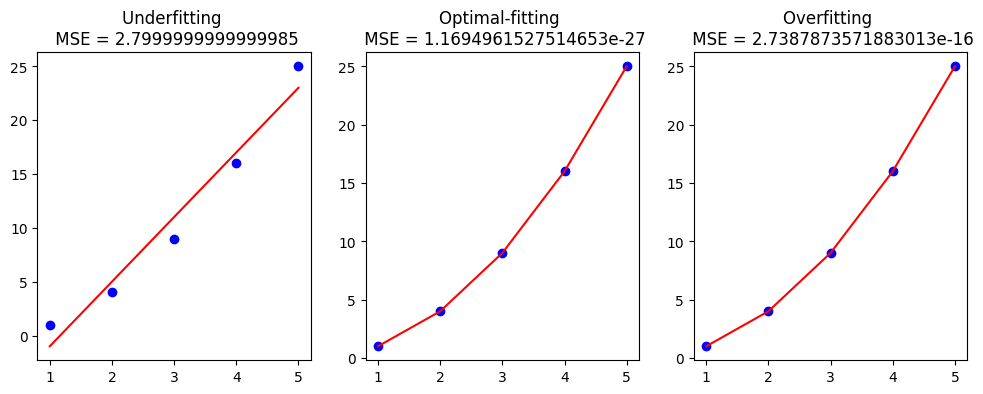

In [48]:
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(12,4))
#Underfitting (Linear Regression)
plt.subplot(1,3,1) #baris 1 kolom 3, urutan 1
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred = linear_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE training
plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color = 'red')
plt.title(f'Underfitting \n MSE = {mse}')
#Optimal-fitting / Good Generalization (Polynomial regression derajat = 5)
plt.subplot(1,3,2) #baris 1 kolom 3, urutan 2
optimal_model = make_pipeline (PolynomialFeatures (degree=5), LinearRegression()) #Polynomial regression
optimal_model.fit(x,y)
y_pred = optimal_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE training
plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color = 'red')
plt.title(f'Optimal-fitting \n MSE = {mse}')
#Optimal-fitting / Good Generalization (Polynomial regression derajat = 20)
plt.subplot(1,3,3) #baris 1 kolom 3, urutan 3
overfit_model = make_pipeline (PolynomialFeatures (degree=20), LinearRegression()) #Polynomial regression
overfit_model.fit(x,y)
y_pred = overfit_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE training
plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color = 'red')
plt.title(f'Overfitting \n MSE = {mse}')